In [228]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy.random as nprnd
import random
import json
import numpy as np

In [229]:
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [230]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6


In [231]:
# problem 2

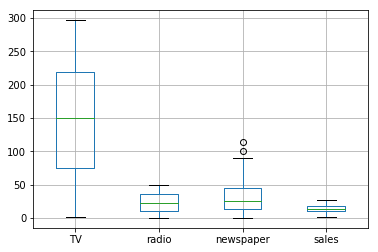

In [232]:
# Part 0

# boxplot
df.boxplot()

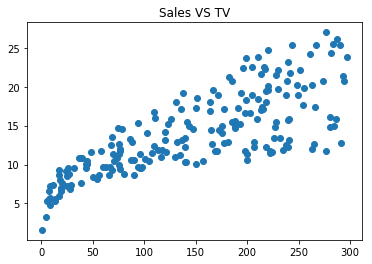

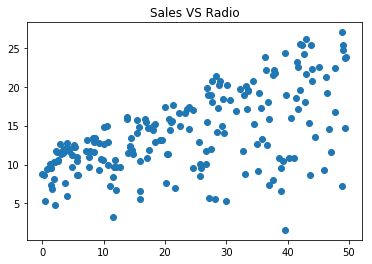

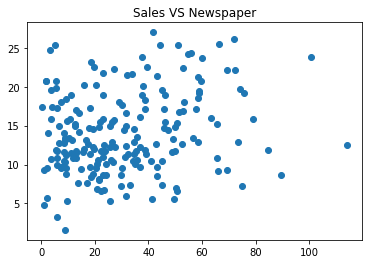

In [233]:
# Part 1

# scatter plots over TV, Ratio and Newspaper
plt.title('Sales VS TV')
plt.scatter(df[['TV']], df[['sales']])
plt.show()
# We can see there is linear relationship between Sales and the money spent on TV advertisement, 
# but the linear relationship is not very strong.

plt.title('Sales VS Radio')
plt.scatter(df[['radio']], df[['sales']])
plt.show()
# We can see there is linear relationship between Sales and the money spent on Radio advertisement, 
# but the linear relationship is very weak.

plt.title('Sales VS Newspaper')
plt.scatter(df[['newspaper']], df[['sales']])
plt.show()
# We can see there is not obvious linear relationship between Sales and the money spent on Newspaper advertisement. 


/Users/guanshan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


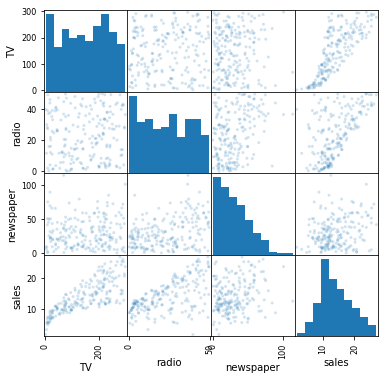

In [234]:
from pandas.tools.plotting import scatter_matrix
#import pandas.plotting.scatter_matrix
spm = pd.tools.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')

In [235]:
from sklearn.linear_model import LinearRegression
# random the data, and set seed
random.seed(1)
df = df.sample(frac=1).reset_index(drop=True) # set the new index, make the data random

In [236]:
# Part II

In [237]:
# a) set y to be the sales in df
y = df[['sales']]

In [238]:
# b) Set X to be just the features described above in df
X = df[['TV','radio','newspaper']]

In [239]:
# c) Randomly split data into training and testing - 80% training, 20% testing.
size = len(X.index)
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]
X_test.head(5)

,TV,radio,newspaper
160,175.7,15.4,2.4
161,292.9,28.3,43.2
162,13.1,0.4,25.6
163,110.7,40.6,63.2
164,28.6,1.5,33.0


In [240]:
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]
y_test.head(5)

,sales
160,14.1
161,21.4
162,5.3
163,16.0
164,7.3


In [241]:
# d) Train model on training data, and make predictions on testing data

# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))


Coefficients: 
 [[ 0.04743465  0.19124689 -0.00266313]]
Residual sum of squares: 1.86


In [242]:
# e) Evalute the R^2 on testing data. Is this good? Bad? Why?
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

# the prediction is good, since R^2 is 0.89,  high level

Variance score: 0.89


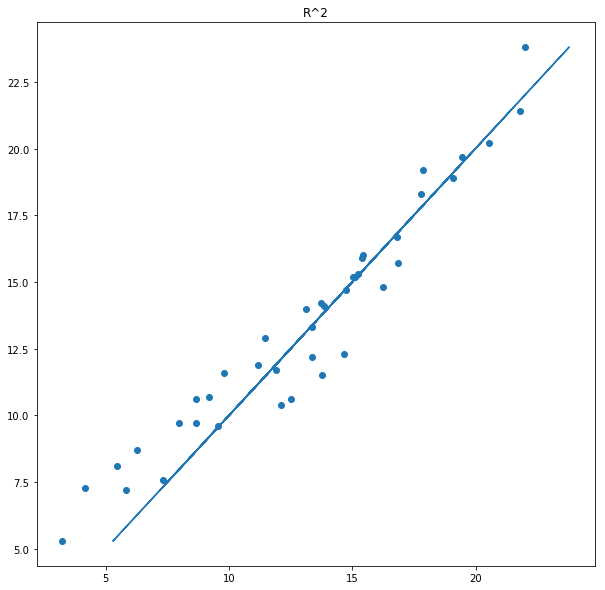

In [243]:
# f) Make a scatter plot of your predictions vs the actual values on the testing data.
plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

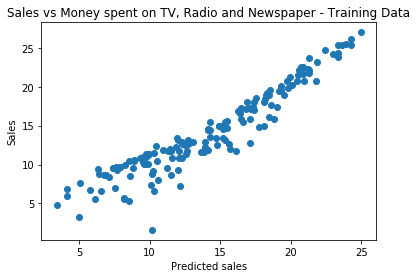

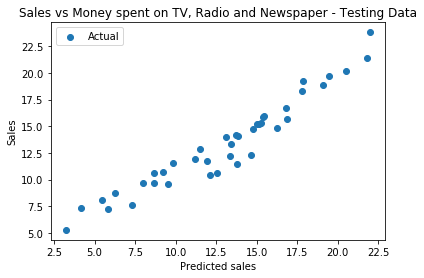

In [244]:
plt.ylabel('Sales')
plt.xlabel('Predicted sales')
plt.title('Sales vs Money spent on TV, Radio and Newspaper - Training Data')
plt.scatter(regr.predict(X_train),y_train)
plt.show()
plt.ylabel('Sales')
plt.xlabel('Predicted sales')
plt.title('Sales vs Money spent on TV, Radio and Newspaper - Testing Data')
plt.scatter(regr.predict(X_test),y_test,label='Actual')
plt.legend(loc=2)
plt.show()

In [245]:
# g) Can you measure the importance of features in this model? 
# What is something you should check before making conclusions?
regr.coef_

# No, we cannot. We need to check whether the data has been normalized in the same scale.

array([[ 0.04743465,  0.19124689, -0.00266313]])

In [246]:
# h) What can you conclude from g) - can you think of a way to interpret the result? 
#  What should we have done to measure the importance of the features involved?

# We should first standardize the data, then apply linear regression agaion to interpret the result.

# get new dataframe
df_X = pd.DataFrame()
df_Y = pd.DataFrame()

# Standardize the data
df_X['TV'] = (X['TV'] - X['TV'].mean())/ X['TV'].std()
df_X['radio'] = (X['radio'] - X['radio'].mean())/ X['radio'].std()
df_X['newspaper'] = (X['newspaper'] - X['newspaper'].mean())/ X['newspaper'].std()

df_Y['sales'] = (y['sales'] - y['sales'].mean())/ y['sales'].std()

# split to train and test
size = len(df_X.index)
df_X_train = df_X[0:int(size*0.8)]
df_X_test = df_X[int(size*0.8):]
df_Y_train = df_Y[0:int(size*0.8)]
df_Y_test = df_Y[int(size*0.8):]


# apply linear regression
# Train the model using the training sets
regr.fit(df_X_train, df_Y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(df_X_test) - df_Y_test) ** 2))
# R^2
print('Variance score: %.2f' % regr.score(df_X_test, df_Y_test))

# The prediction is good, since R^2 is 0.89,  high level.
# Now TV has the highest importance.

Coefficients: 
 [[ 0.78054619  0.54421269 -0.01111638]]
Residual sum of squares: 0.07
Variance score: 0.89


In [247]:
# How can we imrove the performance?

# Try plotting the data in three dimensions along with the hyperplane solution, 
# see if you can infer a new variable which will help, or try a nonlinear/non-parametric model


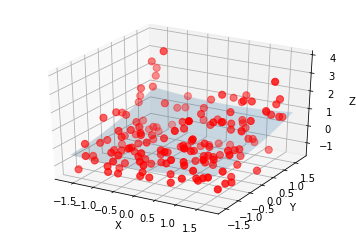

In [248]:
# draw hyperplane order = 2
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# some 3-dim points
x = df_X_train['TV']
y = df_X_train['radio']
z = df_X_train['newspaper']
data = np.c_[x,y,z]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
XX = X.flatten()
YY = Y.flatten()


order = 2    # 1: linear, 2: quadratic
if order == 1:
    # best-fit linear plane
    A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
    # evaluate it on grid
    Z = C[0]*X + C[1]*Y + C[2]
    
    # or expressed using matrix/vector product
    #Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

elif order == 2:
    # best-fit quadratic curve
    A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
    C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
    # evaluate it on a grid
    Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# plot points and fitted surface
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')
plt.show()

In [249]:
# We can try new models by adding an X1*X2 term, then use R^2 to check the performace

# apply linear regression
# Train the model using the training sets

df_X_train.head(5)
df_X_train['TV*Radio'] = pd.Series(df_X_train['TV']*df_X_train['radio'] , index = df_X_train.index)
df_X_test['TV*Radio'] = pd.Series(df_X_test['TV']*df_X_test['radio'], index = df_X_test.index)

regr.fit(df_X_train, df_Y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(df_X_test) - df_Y_test) ** 2))
# R^2
print('Variance score: %.2f' % regr.score(df_X_test, df_Y_test))

# The prediction is good, since R^2 is 0.97, so the performance got improved.
# Now TV has the highest importance, radio is the second, and the interation between TV and radio also plays a sigificant role


Coefficients: 
 [[ 0.7356423   0.52600207  0.00128651  0.27143296]]
Residual sum of squares: 0.02
Variance score: 0.97


/Users/guanshan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/guanshan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [250]:
# problem3

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


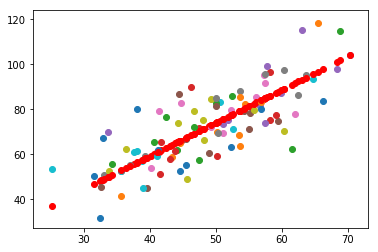

In [251]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) ####
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))   ####
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m] #get the new b and m after a step

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m] # get the b,m after n steps


def run(num_iterations, learning_rate = 0.0001):
    points = genfromtxt("https://raw.githubusercontent.com/Columbia-Intro-Data-Science/APMAE4990-/master/data/data.csv", delimiter=",")
    # 0.0001 - 0.0004 ok, if smaller than 0.0001, can increase the # of running times to get the result
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


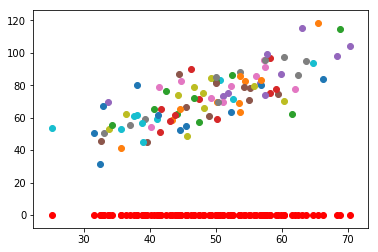

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


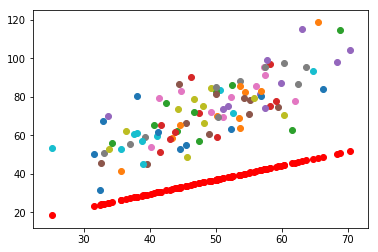

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


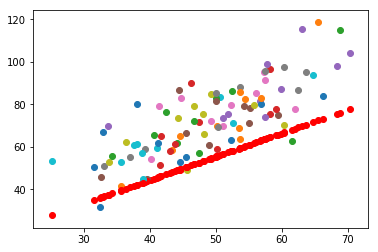

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


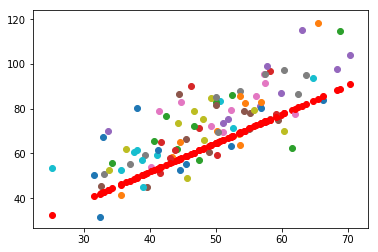

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


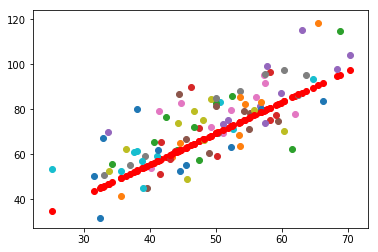

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


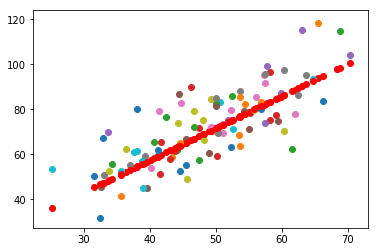

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


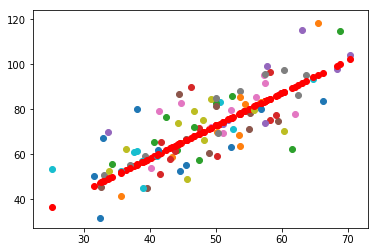

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


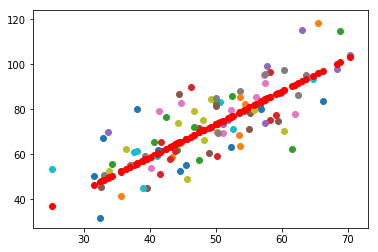

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


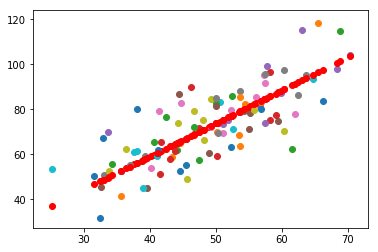

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


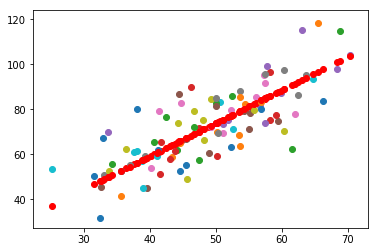

In [252]:
# Use this to visually discuss convergence rate based on learning rate

# rate = 0.0001
for num in range(0,10):
    run(num, learning_rate = 0.0001)
    plt.show()

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


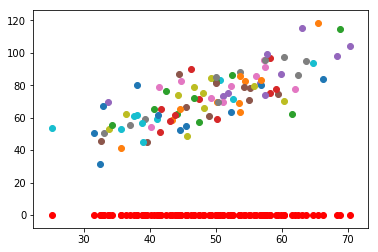

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.14547010110737296, m = 7.370702973591052, error = 86648.7950040084


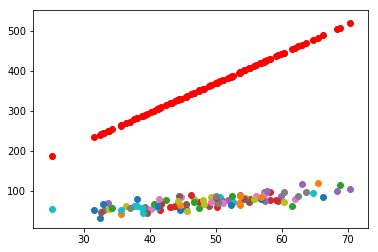

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.4310655239730718, m = -21.99310808948739, error = 1373530.9288716826


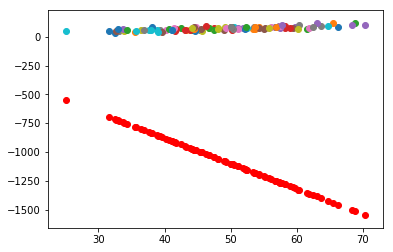

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 1.8687588994744613, m = 94.98776074664512, error = 21797683.773910433


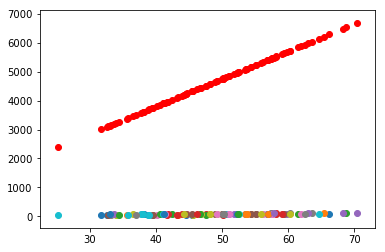

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -7.290394967823431, m = -371.0461698674138, error = 345950151.4758198


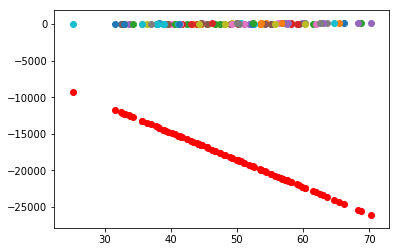

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 29.201266087964783, m = 1485.5616013916942, error = 5490585677.503522


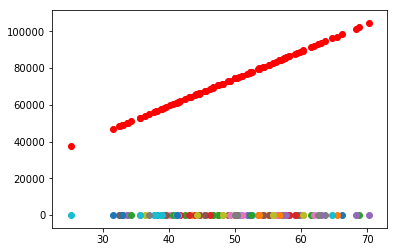

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -116.1729306293348, m = -5910.879572855865, error = 87141281978.78775


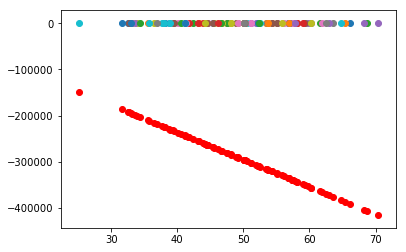

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 462.9786062650985, m = 23555.409616750556, error = 1383022432889.3494


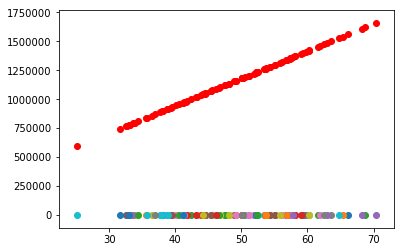

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1844.2694554138704, m = -93833.77530608332, error = 21949998997164.68


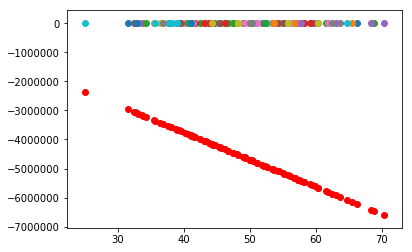

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 7347.456577722989, m = 373826.76516900567, error = 348369227101706.6


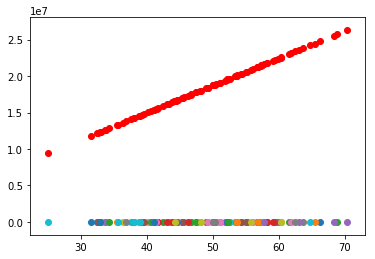

In [253]:
# rate = 0.001
for num in range(0,10):
    run(num, learning_rate = 0.001)
    plt.show()
# When rate = 0.001, m doesn't converge at all. It actually diverges.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


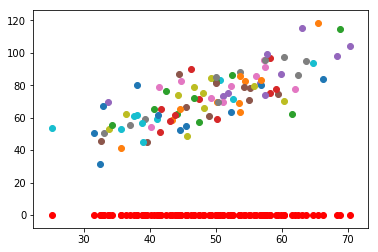

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.029094020221474594, m = 1.4741405947182105, error = 112.70750122899199


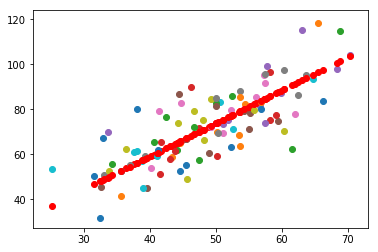

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.029307811395436454, m = 1.4789006279696415, error = 112.65052279457352


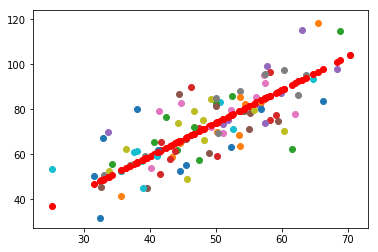

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.029428299719611955, m = 1.478913651241336, error = 112.65044995000876


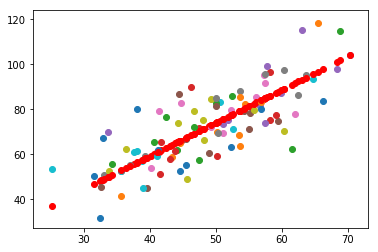

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.029548484809344765, m = 1.4789113387638853, error = 112.65037770154348


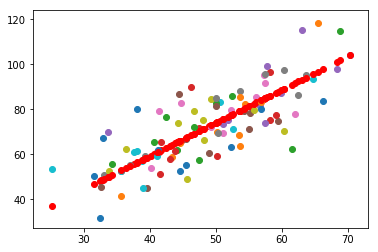

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.02966866711106594, m = 1.478908976778002, error = 112.65030545526567


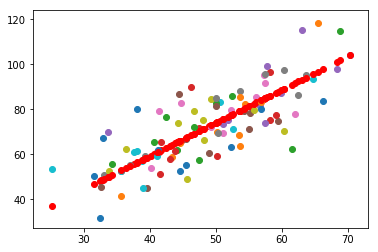

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02978884759543099, m = 1.4789066146677181, error = 112.65023321116905


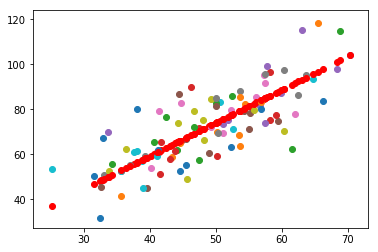

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.02990902626560303, m = 1.4789042525925749, error = 112.65016096925352


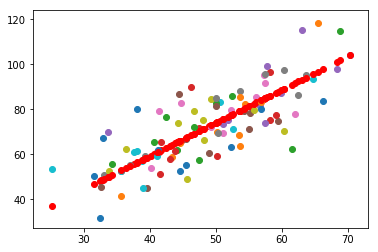

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.030029203121619573, m = 1.4789018905530862, error = 112.65008872951903


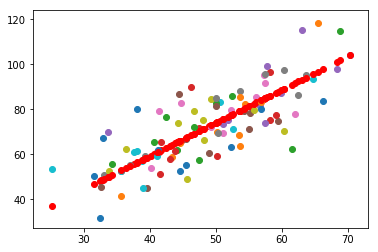

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.03014937816350804, m = 1.4788995285492539, error = 112.65001649196543


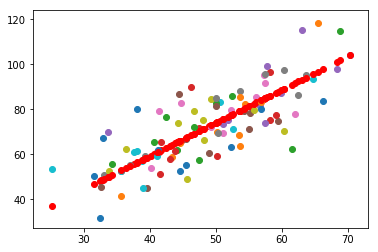

In [254]:
# rate = 0.0002
for num in range(0,10):
    run(num, learning_rate = 0.0002)
    plt.show()

# When rate = 0.0002, m converge fater than 0.0001, after 2 rounds.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


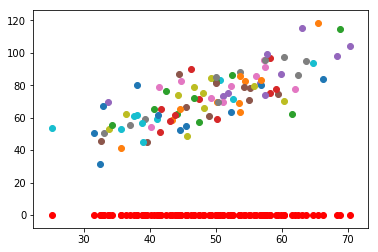

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.05818804044294919, m = 2.948281189436421, error = 5494.876051554403


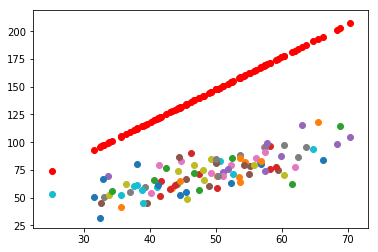

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0008551646958474546, m = 0.019040133005722826, error = 5425.548903532563


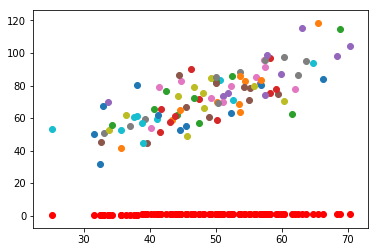

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.05829678234050579, m = 2.9293452426042537, error = 5357.114738058191


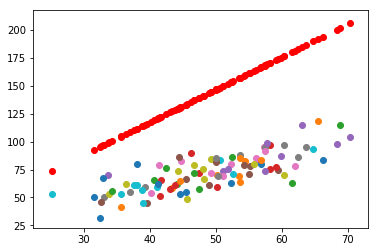

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.0017054776406117411, m = 0.0378348940251243, error = 5289.562052862701


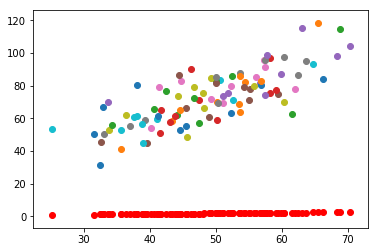

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.05841028677277326, m = 2.9106530834885644, error = 5222.879493835148


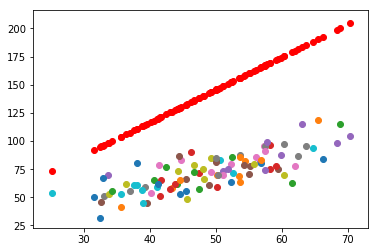

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0025510009562452057, m = 0.05638744363626502, error = 5157.055853113861


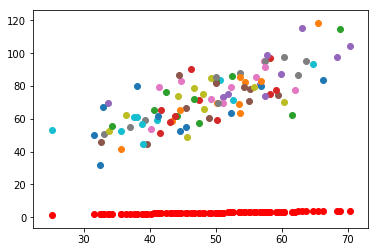

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.05852849202267843, m = 2.8922015719324805, error = 5092.080067202602


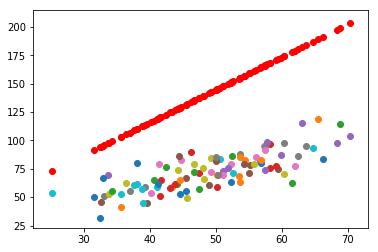

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.0033917959645461543, m = 0.0747009017066449, error = 5027.94121511106


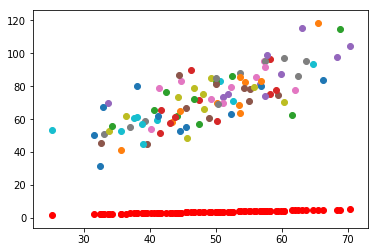

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.05865133716813143, m = 2.8739876082266385, error = 4964.628516519291


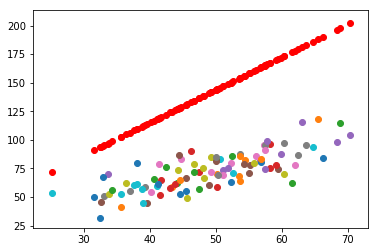

In [255]:
# rate = 0.0004
for num in range(0,10):
    run(num, learning_rate = 0.0004)
    plt.show()
# When rate = 0.0004, m converge slower than 0.0002, after  > 10 rounds.

In [256]:
# Conclusion in math explanation: 
# There are three situations:

# 1. "Good": 
# When learning_rate is around a certain value a (0.0002), a step is larger. The new_m converges to the true m is faster.
# In this case, the convergence rate is higher.


# 2. "Slowly convergent": 
# When learning_rate is smaller than a certain value b, b<a (0.00005), a step is samller.
# The updated b is closer from the true b compared to the starting b.
# Thus, it takes more steps to get the true b. 


# 3. "Divergent": 
# When learning_rate is larger than a certain value c, c>b>a (0.0005), a step is even larger. The new_b after a step cross the 0 value 
# and it now has the oppositie sign of the true b. Moreover, it is even further from the true b compared to the starting b


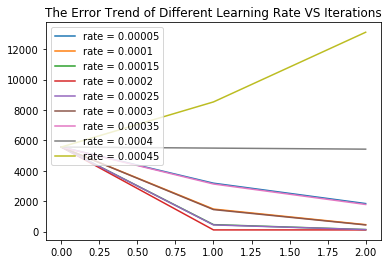

In [257]:
# Problem 3 part 2

# Plot the error as a function of the number of iterations for various learning rates. 
# Choose the rates so that it tells a story.

import matplotlib.pyplot as plt
import numpy as np

def get_error(num_iterations, learning_rate = 0.0001):
    points = genfromtxt("https://raw.githubusercontent.com/Columbia-Intro-Data-Science/APMAE4990-/master/data/data.csv", delimiter=",")
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    error_list = []
    num_iterations = num_iterations
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    new_error = compute_error_for_line_given_points(b, m, points)
    return new_error


def error_plot(iteration):    
    learning_rate_list = range(5, 50, 5)
    for i in learning_rate_list:
        k = i/100000
        error_list = []
        for j in range(iteration):    
            e = get_error(j, k)
            error_list.append(e)
        # print(error_list)
        x = range(iteration)
        plt.plot(x, error_list)
    
    plt.legend(['rate = 0.00005',  'rate = 0.0001',
                'rate = 0.00015', 'rate = 0.0002',
                'rate = 0.00025', 'rate = 0.0003',
                'rate = 0.00035', 'rate = 0.0004',
                'rate = 0.00045', 'rate = 0.0005'], loc='upper left')
    plt.title('The Error Trend of Different Learning Rate VS Iterations')
    plt.show()


error_plot(3)

In [258]:
# From the plot above, we can see clearly that if learning_rate <= 0.0004, it converges; 
# rate = 0.0002 makes it converge the fastest. rate < 0.0002 or 0.0004 >= rate > 0.0002 have slower convergence rates.
# If learning_rate >= 0.00045, it diverges.
